1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


C:\Users\Standard\AppData\Local\Temp\ipykernel_10032\3507679934.py:40: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


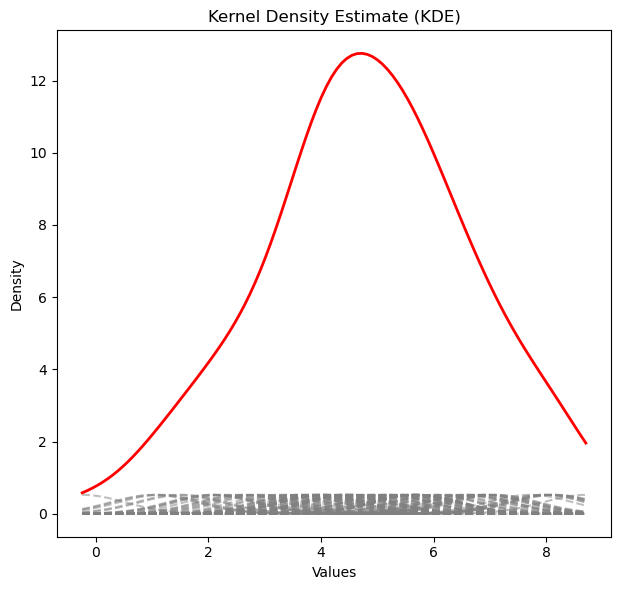

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapz

# Step 1: Generate normally distributed data
np.random.seed(42)  # for reproducibility
N = 100
mean_value = 5
std_dev = 2
x = np.random.normal(mean_value, std_dev, N)

# Step 2: Plot the histogram
plt.figure(figsize=(12, 6))

# Histogram
hist, bin_edges, _ = plt.hist(x, bins=15, alpha=0.7, color='blue', edgecolor='black', linewidth=1.2)

# Aesthetics
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram with KDE')

# Set y-axis major ticks labels to integers
plt.yticks(np.arange(0, max(hist) + 1, 1))

# Calculate Poisson uncertainty as square root of the counts
errors = np.sqrt(hist)

# Plot the histogram as data points with errors
plt.errorbar(bin_edges[:-1], hist, yerr=errors, fmt='o', color='blue', capsize=5, markersize=6)

# Step 3: Generate Gaussian functions
std_default = 1.06 * x.std() * x.size ** (-1/5)

# Create an array of x values for the Gaussian functions
x_vals = np.linspace(min(x), max(x), 100)

# Plot Gaussian functions
plt.subplot(1, 2, 2)
plt.title('Kernel Density Estimate (KDE)')

# Sum of Gaussian functions
kde_sum = np.zeros_like(x_vals)

for val in x:
    # Calculate standard deviation for the Gaussian function
    std = std_default
    gaussian = norm.pdf(x_vals, loc=val, scale=std)
    
    # Plot individual Gaussian functions
    plt.plot(x_vals, gaussian, '--', color='gray', alpha=0.5)

    # Add to the sum
    kde_sum += gaussian

# Normalize the sum to match the integral of the original histogram
area_hist = trapz(hist, dx=(bin_edges[1] - bin_edges[0]))
area_kde = trapz(kde_sum, dx=(x_vals[1] - x_vals[0]))
kde_sum_normalized = kde_sum * (area_hist / area_kde)

# Plot the sum of Gaussian functions (normalized)
plt.plot(x_vals, kde_sum_normalized, color='red', linewidth=2)

# Aesthetics for the KDE plot
plt.xlabel('Values')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [5]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

"wget" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


FileNotFoundError: No such file or directory: 'two_categories_scatter_plot.png'

FileNotFoundError: No such file or directory: 'two_categories_scatter_plot.png'

<IPython.core.display.Image object>

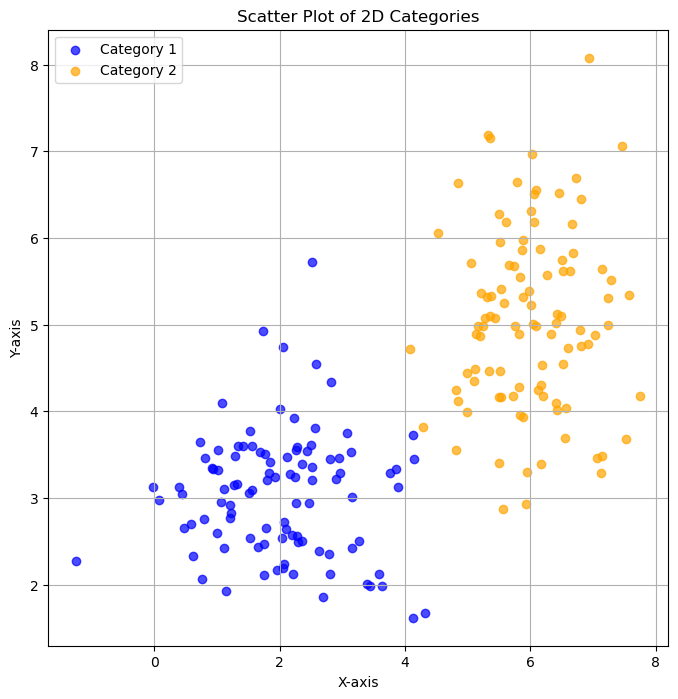

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_2d_gaussian_data(mean, std, size):
    """
    Generate 2D Gaussian data with a given mean and standard deviation.

    Parameters:
    - mean: Mean of the Gaussian distribution (2D array).
    - std: Standard deviation of the Gaussian distribution (2D array).
    - size: Number of data points to generate.

    Returns:
    - data: Generated 2D Gaussian data with shape (size, 2).
    """
    data = np.random.multivariate_normal(mean, np.diag(std), size)
    return data

def scatter_plot_2d_categories(*categories):
    """
    Display a scatter plot for 2D datasets with different marker colors for each category.

    Parameters:
    - categories: Tuple of 2D datasets for each category.

    Returns:
    None (displays the plot).
    """
    plt.figure(figsize=(8, 8))

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'yellow']

    for i, category in enumerate(categories):
        plt.scatter(category[:, 0], category[:, 1], label=f'Category {i + 1}', color=colors[i], alpha=0.7)

    plt.title('Scatter Plot of 2D Categories')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example with two categories
mean1 = [2, 3]
std1 = [1, 0.5]
category1 = generate_2d_gaussian_data(mean1, std1, size=100)

mean2 = [6, 5]
std2 = [0.7, 1]
category2 = generate_2d_gaussian_data(mean2, std2, size=100)

scatter_plot_2d_categories(category1, category2)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

   residuals  distances
0       1.10       16.0
1      -1.95        6.3
2      -7.20        3.4
3      -4.15        8.4
4      -6.59        1.7


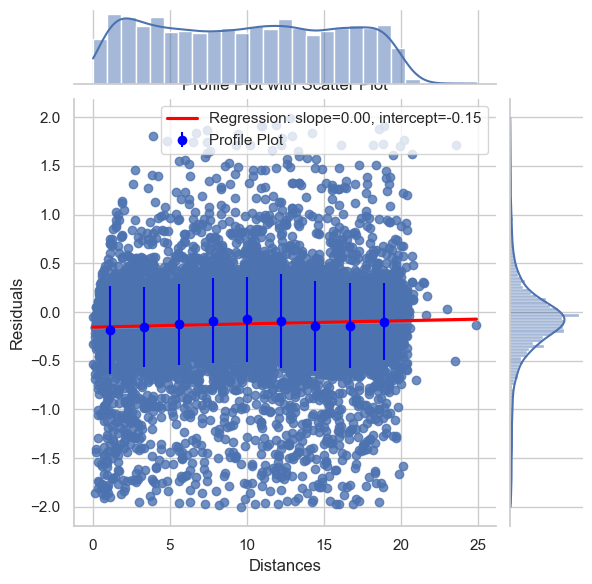

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Download the dataset and load it as a pandas dataframe
# Note: Use the np.load() function, call .item(), and pass it to the pd.DataFrame() constructor
url = 'https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy'
data = np.load('residuals_261.npy', allow_pickle=True).item()
df = pd.DataFrame(data)

# Inspect the dataset
print(df.head())

# Clean the sample by selecting entries with |residuals| < 2
df_cleaned = df[np.abs(df['residuals']) < 2]

# Perform linear regression of "residuals" versus "distances"
slope, intercept, r_value, p_value, std_err = linregress(df_cleaned['distances'], df_cleaned['residuals'])

# Plot seaborn jointplot with linear regression
sns.set(style="whitegrid")
plot = sns.jointplot(x='distances', y='residuals', data=df_cleaned, kind='reg', line_kws={'label': f'Regression: slope={slope:.2f}, intercept={intercept:.2f}', 'color': 'red'})

# Fill numpy arrays for the profile plot
bins = np.linspace(0, 20, 10)  # Adjust the number of bins as needed
x = (bins[1:] + bins[:-1]) / 2
y = []
erry = []

for i in range(len(bins) - 1):
    subset = df_cleaned[(df_cleaned['distances'] >= bins[i]) & (df_cleaned['distances'] < bins[i + 1])]
    y.append(subset['residuals'].mean())
    erry.append(subset['residuals'].std())

# Plot the profile plot on top of the scatter plot
plt.errorbar(x, y, yerr=erry, fmt='o', color='blue', label='Profile Plot')
plt.legend()
plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.title('Profile Plot with Scatter Plot')
plt.show()